In [ ]:
%pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
#df= pd.read_csv('https://lukedb.co/python_csv')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
job4='Data Analyst'
country4='United States'
df_us=df[(df['job_title_short']==job4)& (df['job_country']==country4)].copy()
df_us['job_posted_month_no']=df_us['job_posted_date'].dt.month
df_explode=df_us.explode('job_skills')
df_us_pivot=df_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_us_pivot.loc['Total']=df_us_pivot.sum()
df_us_pivot=df_us_pivot[df_us_pivot.loc['Total'].sort_values(ascending=False).index]
df_us_pivot=df_us_pivot.drop('Total')

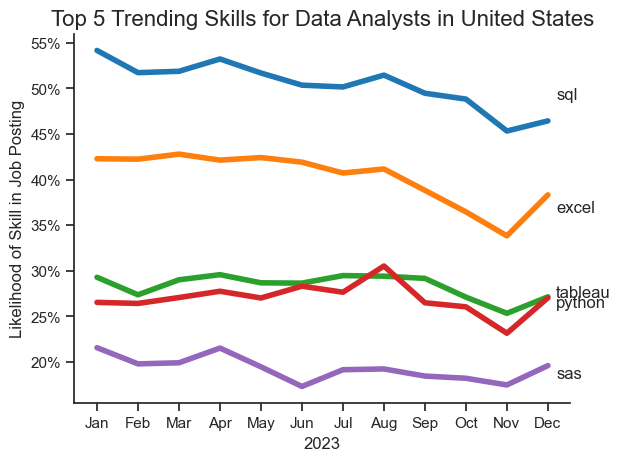

In [6]:
count=5
df_us_totals=df_us.groupby('job_posted_month_no').size()
df_us_percent=df_us_pivot.div(df_us_totals/100, axis=0)
df_us_percent=df_us_percent.reset_index()
df_us_percent['job_posted_month']=df_us_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_us_percent=df_us_percent.set_index('job_posted_month', drop=True).drop(columns='job_posted_month_no')
df_us_plot=df_us_percent.iloc[:,:count]
sns.set_theme(style='ticks')

sns.lineplot(data=df_us_plot, dashes=False, palette='tab10', linewidth=4)
sns.despine()
plt.title(f'Top {count} Trending Skills for {job4}s in {country4}', fontsize=16)
plt.xlabel('2023')
plt.ylabel('Likelihood of Skill in Job Posting')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter 
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(count):
    plt.text(11.2, df_us_plot.iloc[9, i], df_us_plot.columns[i])
plt.show()